В распоряжении данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.
О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка.

Задача: найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

Описание данных:
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — общая площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
pd.options.mode.chained_assignment = None  # отключаем предупреждения Pandas
import warnings 
warnings.filterwarnings('ignore') # отключаем предупреждения

# ШАГ 1 ознакомление с данными

In [2]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('real_estate_data.csv', sep='\t')

In [3]:
data.head(50) #посмотрим на данные

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
data.info()
data.isna().sum().sort_values()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

total_images                0
open_plan                   0
floor                       0
rooms                       0
studio                      0
total_area                  0
last_price                  0
first_day_exposition        0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
ponds_around3000         5518
parks_around3000         5518
cityCenters_nearest      5519
airports_nearest         5542
ceiling_height           9195
balcony                 11519
ponds_nearest           14589
parks_nearest           15620
is_apartment            20924
dtype: int64

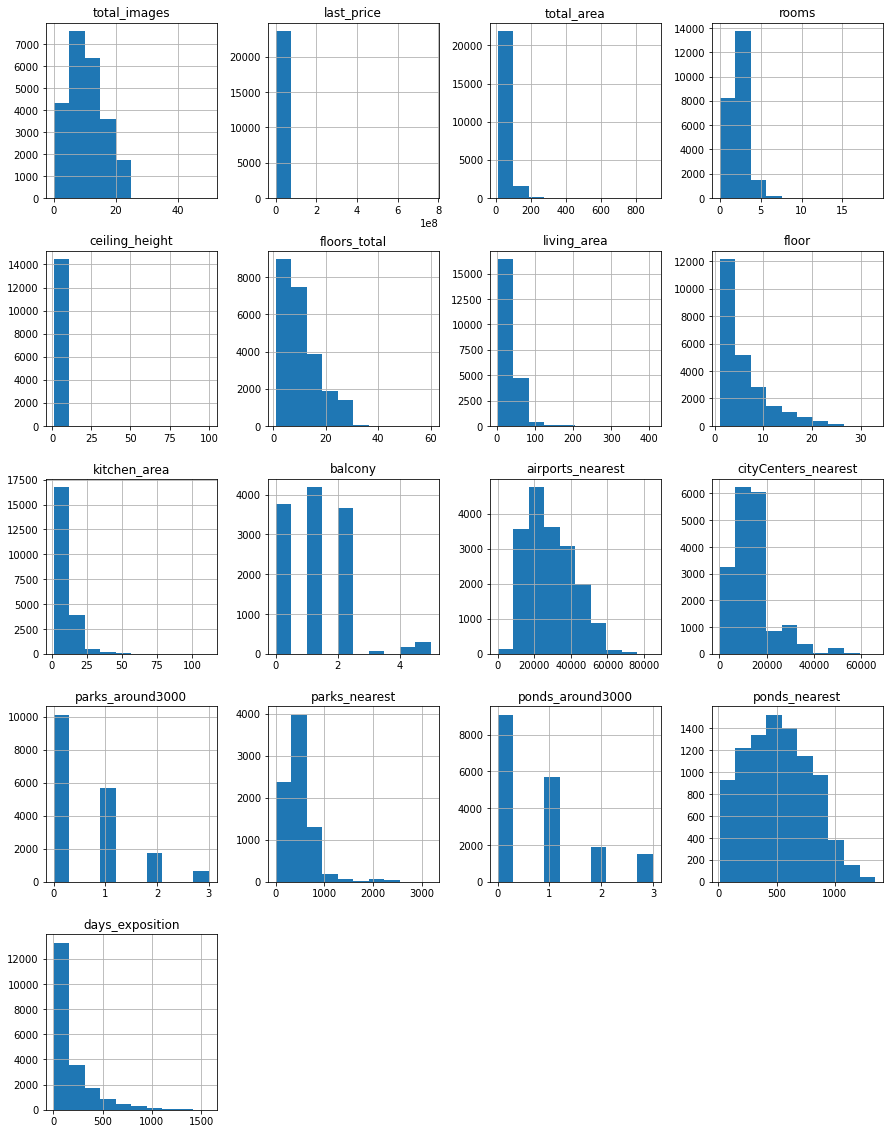

In [5]:
data.hist(figsize=(15, 20))
plt.show(); #построим гистограммы для всех столбцов таблицы

ШАГ 2

In [6]:
data.describe().astype(int)


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699,23699,23699,23699,14504,23613,21796,23699,21421,12180,18157,18180,18181,8079,18181,9110,20518
mean,9,6541548,60,2,2,10,34,5,10,1,28793,14191,0,490,0,517,180
std,5,10887013,35,1,1,6,22,4,5,1,12630,8608,0,342,0,277,219
min,0,12190,12,0,1,1,2,1,1,0,0,181,0,1,0,13,1
25%,6,3400000,40,1,2,5,18,2,7,0,18585,9238,0,288,0,294,45
50%,9,4650000,52,2,2,9,30,4,9,1,26726,13098,0,455,1,502,95
75%,14,6800000,69,3,2,16,42,8,12,2,37273,16293,1,612,1,729,232
max,50,763000000,900,19,100,60,409,33,112,5,84869,65968,3,3190,3,1344,1580


In [7]:
# построим описательную таблицу знаечний 
def nan_col_data(data):
    
    values = pd.DataFrame()
    
    for column in data.columns:
        values[column] = [data[column].unique(), data[column].dtypes, data[column].nunique()]

    return values.transpose().sort_values(by=1, ascending=True).rename(
        {0: 'значения', 1: 'тип данных', 2: 'кол-во уникальных значений', 3: 'Процент пропущенных'}, axis=1)

In [8]:
#построим таблицу пустых значений и их долей в столбцах датафрейма и объединим с описательной таблицей
def missing_data_percantage(data):
    count_missing = data.isna().sum()
    percent_missing = round(data.isna().sum() * 100 / len(data))
    
    missing_value_data = pd.DataFrame({'название столбца': data.columns,
                                     'количество пропущенных': count_missing,
                                     'доля пропущенных, %': percent_missing})
    
    return missing_value_data
missing_data_percantage(data)

df_missing = missing_data_percantage(data).join(nan_col_data(data))
df_missing.set_index('название столбца', inplace=True)
df_missing.sort_values(by='доля пропущенных, %', ascending=False)

,количество пропущенных,"доля пропущенных, %",значения,тип данных,кол-во уникальных значений
название столбца,,,,,
is_apartment,20924,88.0,"[nan, False, True]",object,2
parks_nearest,15620,66.0,"[482.0, nan, 90.0, 84.0, 112.0, 310.0, 294.0, ...",float64,995
ponds_nearest,14589,62.0,"[755.0, nan, 574.0, 234.0, 48.0, 553.0, 298.0,...",float64,1096
balcony,11519,49.0,"[nan, 2.0, 0.0, 1.0, 5.0, 4.0, 3.0]",float64,6
ceiling_height,9195,39.0,"[2.7, nan, 3.03, 2.5, 2.67, 2.56, 3.05, 2.75, ...",float64,183
ponds_around3000,5518,23.0,"[2.0, 0.0, 3.0, 1.0, nan]",float64,4
parks_around3000,5518,23.0,"[1.0, 0.0, 2.0, nan, 3.0]",float64,4
cityCenters_nearest,5519,23.0,"[16028.0, 18603.0, 13933.0, 6800.0, 8098.0, na...",float64,7642
airports_nearest,5542,23.0,"[18863.0, 12817.0, 21741.0, 28098.0, 31856.0, ...",float64,8275


Первые наблюдения:

1) название столбцов cityCenters_nearest, ponds_around3000, parks_around3000 нужно изменить в соответствии с требованиями PEP8;

2) сразу видно большое количество пропусков в переменной is_apartment. Так как это булев тип данных, то можно предположить, что True - это квратиры. В таком случае квартир в выборке гораздо меньше, чем апартаментов, что кажется странным, учитывая, что в переменной kitchen_area нулевых знаечний меньше (нулевая площадь кухни как раз может быть в апартаментах), а также медианное значение переменной rooms - 2 комнаты. Также по некоторым наблюдениям есть четкий False, что может означать, что многие из NaN - квартиры. 

3) также странным выглядит множественное количество нулевых значений в переменной ceiling_height, так как высота потолков в метрах не может быть нулевой;

4) 49 наблюдений остались без имени населенного пункта. Учитывая малое количество пропусков, можно предположить, что продавцы специально не указывают наименование пункта, так как уверены, что если выбран раздел "Санкт-Петербург", то и квартира в Санкт-Петербурге, не уточняя, что это может быть и Лен. область. С учетом малого количества пропусков предлагается просту их удалить из таблицы.

5) в переменной lastprice имеется аномальное минимальное значение;

6) есть нулевые значения в перменной airports_nearest; 

7) переменнные ponds_nearest и parks_nearest совершенно пустые и, скорее всего, неинформативные (как качественно, ведь наличие парков и прудов рядом обычно вторично при выборе квартиры (особенно информация об удаленности в метрах), так и количественно). К тому же данный параметр заполняется системой, ввиду чего скорее всего не имеет смысла заострять внимание на этих переменных. Предлагается не заполнять пропуски и не брать столбцы в анализ.

8) переменная living_area также имеет пропуски. Возможно это связано с тем, что поиск работает по общей площади и покупатель в основном ищет квартиру по общей площади, а не жилой; 

9) есть пустые значения в перменных airports_nearest и cityCenters_nearest, которые заполняются автоматически системой. Пропуски могут быть вызваны тем, что система искала аэропорты и центр города в радиусе относительно определенной выбранной точки на карте и если не находила, то возвращала ноль;

10) parks_nearest и ponds_nearest имееют пустые пропуски, как и ponds_around3000 и parks_around3000.

11) Пропуски в days_exposition очень неприятны, так как параметр довольно-таки интересный (всегда интересно посмотреть квартиры какой ценовой категории "отрывают" с руками, а какие висят бремененм мертвого груза на собственниках. Особенности спроса, отражающие косвенно социально-экономическую обстановку региона все-таки). Они могут быть вызваны тем, что продавец не передал сервису информациб о закрывшейся сделке.

In [9]:
data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest', 'ponds_around3000': 'ponds_around_3000', 'parks_around3000': 'parks_around_3000' }, inplace=True)

In [10]:
#переведем столбец с датой в формат даты без времени, т.к. время не указано
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')


In [11]:
#Проверим таблицу
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


###  удаление неявных дубликатов

In [12]:

data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [13]:
#в данных видно, что имеются неявные дубликаты с буквами е и ё в типах населенных пунктов (поселок, город и тд).
#поскольку нам неважен тип населенного пункта, то можно его просто удалить перед названием
replace_dict = ['поселок ', 'городского типа ', 'городской ',  'деревня ', 
                'коттеджный ', 'село ', 'посёлок ', 'при железнодорожной станции ',
                'станции ', 'садоводческое некоммерческое товарищество ', 'садовое товарищество ']
for value in replace_dict:
    data['locality_name'] = data['locality_name'].str.replace(value, '')

In [14]:
data['locality_name'].value_counts()

Санкт-Петербург    15721
Мурино               590
Кудрово              472
Шушары               440
Всеволожск           398
                   ...  
Дружноселье            1
Дзержинского           1
Вахнова Кара           1
Реброво                1
Цвылёво                1
Name: locality_name, Length: 305, dtype: int64

In [15]:
list_of_localities = data['locality_name'].unique()
(list_of_localities)

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

In [16]:
#проверим были ли разные типы населенныз пунктов с одинаковыми названиями
#например, поселок Зайчики и деревня Зайчики
counter = {}
for elem in list_of_localities:
    counter[elem] = counter.get(elem, 0) + 1

doubles = {element: count for element, count in counter.items() if count > 1}

print(doubles)


{}


In [17]:
#возвращается пустой список, значит не было населенных пунктов разного типа с одни названием

# ШАГ 2

## 2.1 Заменяем пропуски

In [18]:
#Поскольку будем поочередно рассматривать каждый из столбцов в одной и той же логике, то напишем функцию для быстрого получения необходимых данных

def column_info(column):
    print('тип данных:', data[column].dtypes)
    print('количество пропусков:',data[column].isna().sum())
    if data[column].dtypes != 'object':
        print('минимальное значение:',data[column].min(), 'максимальное значение:', data[column].max() )
    print('уникальные значения:','\n', data[column].value_counts())

### 2.1.1 Столбец is_apartment

In [19]:
#Начнем со столбца с самым большим количесвтом пропусков в долях
column_info('is_apartment')

тип данных: object
количество пропусков: 20924
уникальные значения: 
 False    2725
True       50
Name: is_apartment, dtype: int64


In [20]:
#оставим таблцицу с только заполненными значениями столбца и попробуем понять, где ставят False, а где - True
df_is_apartment_not_nan = data[data['is_apartment'].notna()]
df_is_apartment_not_nan.pivot_table(values='total_area',index='is_apartment', columns = 'rooms', aggfunc='count', margins=True, margins_name='Total')

rooms,0,1,2,3,4,5,6,7,9,Total
is_apartment,,,,,,,,,,
False,6.0,907.0,938.0,667.0,149.0,48.0,6.0,3.0,1.0,2725
True,NaN,20.0,13.0,14.0,1.0,1.0,NaN,1.0,NaN,50
Total,6.0,927.0,951.0,681.0,150.0,49.0,6.0,4.0,1.0,2775


как видно из представленных данных, апартаментами называют не только однокомнатные квартиры. Таким образом, можно сделать вывод, что продавцы, которые продаю апартаменты точно это указывают, а значения NaN появляются из-за того, что продавцы квартир не считают необходимым дополнительно указывать, что у них не апартаменты. 
Таким образом, заполним NaN на False

In [21]:
data['is_apartment'] = data['is_apartment'].fillna('False')

### 2.1.2 Столбцы parks_nearest и ponds_nearest 

In [22]:
#заполним медианными значениями по населенным пунктам
data['parks_nearest'] = data.groupby('locality_name')['parks_nearest'].apply(lambda x: x.fillna(x.median()))
data['parks_nearest'].fillna(data['parks_nearest'].median(), inplace=True)
column_info('parks_nearest')

data['ponds_nearest'] = data.groupby('locality_name')['ponds_nearest'].apply(lambda x: x.fillna(x.median()))
data['ponds_nearest'].fillna(data['ponds_nearest'].median(), inplace=True)
column_info('ponds_nearest')


тип данных: float64
количество пропусков: 0
минимальное значение: 1.0 максимальное значение: 3190.0
уникальные значения: 
 460.0     14503
733.0       324
393.0       218
399.5       157
367.0       136
          ...  
1073.0        1
828.0         1
1909.0        1
1049.0        1
929.0         1
Name: parks_nearest, Length: 997, dtype: int64
тип данных: float64
количество пропусков: 0
минимальное значение: 13.0 максимальное значение: 1344.0
уникальные значения: 
 503.0     12750
133.0       601
593.0       293
584.5       288
444.0       212
          ...  
59.0          1
1069.0        1
1270.0        1
395.0         1
995.0         1
Name: ponds_nearest, Length: 1098, dtype: int64


### 2.1.3 Столбец balcony

In [23]:
column_info('balcony')

тип данных: float64
количество пропусков: 11519
минимальное значение: 0.0 максимальное значение: 5.0
уникальные значения: 
 1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64


In [24]:
#О наличии балкона явно сообщается продавцом, поэтому заполним пропуски значением 0:
data['balcony'] = data['balcony'].fillna(0)

### 2.1.4 Столбец floors_total

In [25]:
column_info('floors_total')

тип данных: float64
количество пропусков: 86
минимальное значение: 1.0 максимальное значение: 60.0
уникальные значения: 
 5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     553
18.0     505
24.0     469
8.0      390
2.0      383
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
37.0       1
34.0       1
33.0       1
60.0       1
29.0       1
52.0       1
Name: floors_total, dtype: int64


In [26]:
#ввиду небольшого количства пропусков (86) предлагается просто удалить их из выборки

In [27]:
data = data.dropna(subset=['floors_total'])

### 2.1.5 Столбец locality_name

In [28]:
column_info('locality_name')

тип данных: object
количество пропусков: 48
уникальные значения: 
 Санкт-Петербург    15651
Мурино               586
Кудрово              470
Шушары               439
Всеволожск           398
                   ...  
Дружноселье            1
Дзержинского           1
Вахнова Кара           1
Реброво                1
Цвылёво                1
Name: locality_name, Length: 305, dtype: int64


In [29]:
#ввиду небольшого количства пропусков (48) предлагается просто удалить их из выборки

In [30]:
data = data.dropna(subset=['locality_name'])

### 2.1.6 Столбец ceiling_height

In [31]:
column_info('ceiling_height')

тип данных: float64
количество пропусков: 9084
минимальное значение: 1.0 максимальное значение: 100.0
уникальные значения: 
 2.50     3515
2.60     1645
2.70     1571
3.00     1108
2.80      988
         ... 
4.25        1
3.39        1
3.93        1
10.30       1
4.65        1
Name: ceiling_height, Length: 183, dtype: int64


In [32]:
#поскольку высота потолков стнадартизирована для каждого из типов домов (тип определяется этажностью, т.к. массовая застройка - Советские серии домов типовых 5-ти и 9-ти этажек, а также современных новостроек, в которых высота потолков определена классом дома) предлагается заполнить высоту медианным значением по группировке этажности и населенного пункта 
data['ceiling_height'] = data.groupby(['locality_name','floors_total'])['ceiling_height'].apply(lambda x: x.fillna(x.median()))
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)
column_info('ceiling_height')

тип данных: float64
количество пропусков: 0
минимальное значение: 1.0 максимальное значение: 100.0
уникальные значения: 
 2.50     4334
2.60     3540
2.70     2967
2.75     2103
2.55     2101
         ... 
2.25        1
10.30       1
8.30        1
4.14        1
4.65        1
Name: ceiling_height, Length: 202, dtype: int64


### 2.1.7 Столбец ponds_around_3000, parks_around_3000

In [33]:
column_info('ponds_around_3000')
print()
column_info('parks_around_3000')

тип данных: float64
количество пропусков: 5500
минимальное значение: 0.0 максимальное значение: 3.0
уникальные значения: 
 0.0    9029
1.0    5662
2.0    1883
3.0    1491
Name: ponds_around_3000, dtype: int64

тип данных: float64
количество пропусков: 5500
минимальное значение: 0.0 максимальное значение: 3.0
уникальные значения: 
 0.0    10039
1.0     5647
2.0     1736
3.0      643
Name: parks_around_3000, dtype: int64


In [34]:
#данные скорее всего берутся системой, которая ищет пруды в радиусе 3 км от выбранной точке
#если их нет, то система не смогла их найти

In [35]:
#посмотрим на строки с пропусками
data[data['ponds_around_3000'].isna()]


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,...,9.10,0.0,Янино-1,NaN,NaN,NaN,460.0,NaN,503.0,55.0
8,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,...,8.81,0.0,Мурино,NaN,NaN,NaN,460.0,NaN,133.0,189.0
12,10,3890000.0,54.00,2016-06-30,2,2.55,5.0,30.00,5,False,...,9.00,0.0,Сертолово,NaN,NaN,NaN,460.0,NaN,503.0,90.0
22,20,5000000.0,58.00,2017-04-24,2,2.75,25.0,30.00,15,False,...,11.00,2.0,Кудрово,NaN,NaN,NaN,460.0,NaN,503.0,60.0
30,12,2200000.0,32.80,2018-02-19,1,2.55,9.0,NaN,2,False,...,NaN,0.0,Коммунар,NaN,NaN,NaN,460.0,NaN,503.0,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.0,62.80,2018-09-18,4,2.50,5.0,45.50,3,False,...,5.50,0.0,Дзержинского,NaN,NaN,NaN,460.0,NaN,503.0,NaN
23692,2,1350000.0,30.00,2017-07-07,1,2.55,5.0,17.50,4,False,...,6.00,0.0,Тихвин,NaN,NaN,NaN,460.0,NaN,503.0,413.0
23695,14,3100000.0,59.00,2018-01-15,3,2.50,5.0,38.00,4,False,...,8.50,0.0,Тосно,NaN,NaN,NaN,460.0,NaN,503.0,45.0
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3.0,29.70,1,False,...,NaN,0.0,Рождествено,NaN,NaN,NaN,460.0,NaN,503.0,NaN


In [36]:
#предположение подкрепляется тем, что пропуски в переменной ponds_around_3000 сопровождаются пропусками в переменных, собираемых системой
#для малых населенных пунктов пруд и парк скорее всего будет один, если он есть, а для Санкт-Петербурга зависит от района (не административный). Районирование в наших данных можно произвести по удаленности от центра
#такая же логика и для аэропортов.


In [37]:
#заменим по этой логике пропуски в ponds_around_3000
data['ponds_around_3000'] = data.groupby('locality_name')['ponds_around_3000'].apply(lambda x: x.fillna(x.mean()))
data['ponds_around_3000'].fillna(data['ponds_around_3000'].mean(), inplace=True)


#и в parks_around_3000
data['parks_around_3000'] = data.groupby('locality_name')['parks_around_3000'].apply(lambda x: x.fillna(x.mean()))
data['parks_around_3000'].fillna(data['parks_around_3000'].mean(), inplace=True)
column_info('ponds_around_3000')
print()
column_info('parks_around_3000')

тип данных: float64
количество пропусков: 0
минимальное значение: 0.0 максимальное значение: 3.0
уникальные значения: 
 0.000000    9029
1.000000    5662
0.769454    5432
2.000000    1883
3.000000    1491
0.770188      60
0.348624       3
0.091954       2
1.128788       1
0.997033       1
1.936842       1
Name: ponds_around_3000, dtype: int64

тип данных: float64
количество пропусков: 0
минимальное значение: 0.0 максимальное значение: 3.0
уникальные значения: 
 0.000000    10042
1.000000     5647
0.611547     5432
2.000000     1736
3.000000      643
0.627606       60
0.482759        2
1.789474        1
0.522255        1
0.242424        1
Name: parks_around_3000, dtype: int64


### 2.1.8 Cтолбец airports_nearest

In [38]:

data['airports_nearest'] = data.groupby('locality_name')['airports_nearest'].apply(lambda x: x.fillna(x.median()))
data['airports_nearest'].fillna(data['airports_nearest'].median(), inplace=True)

column_info('airports_nearest')

тип данных: float64
количество пропусков: 0
минимальное значение: 0.0 максимальное значение: 84869.0
уникальные значения: 
 26763.0    5517
37434.0      61
21928.0      32
44870.0      30
39946.0      30
           ... 
24159.0       1
42695.0       1
53478.0       1
20335.0       1
20875.0       1
Name: airports_nearest, Length: 8254, dtype: int64


### 2.1.9 Столбец days_exposition

In [39]:
column_info('days_exposition')

тип данных: float64
количество пропусков: 3171
минимальное значение: 1.0 максимальное значение: 1580.0
уникальные значения: 
 45.0      879
60.0      538
7.0       234
30.0      208
90.0      200
         ... 
969.0       1
1147.0      1
1.0         1
1148.0      1
1174.0      1
Name: days_exposition, Length: 1139, dtype: int64


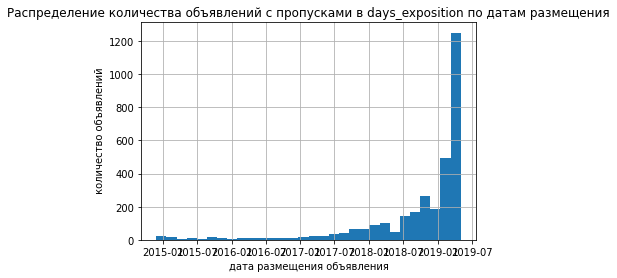

In [40]:
#построим гистограмму распределения количества объявлений по дате размещения
day_na = data.query('days_exposition.isna()')
day_na['first_day_exposition'].hist(bins=30).set(xlabel='дата размещения объявления',
                              ylabel=' количество объявлений', 
                             title='Распределение количества объявлений с пропусками в days_exposition по датам размещения');


По гистограмме заметно, что чем позже дата размещения объявления, тем выше количество объявлений с пропусками. Т.е. пропуски связаны с тем, что владельцы объявлений их просто не закрывали на платформе. 
Срок размещения можно заполнить медианным сроком "жизни" объявления, сгруппировав по общей площади и метсности.

In [41]:
data['days_exposition'] = data.groupby(['locality_name', 'total_area'])['days_exposition'].apply(lambda x: x.fillna(x.median()))
data['days_exposition'].fillna(data['days_exposition'].median(), inplace=True)

column_info('days_exposition')

тип данных: float64
количество пропусков: 0
минимальное значение: 1.0 максимальное значение: 1580.0
уникальные значения: 
 97.0      994
45.0      919
60.0      588
90.0      266
7.0       234
         ... 
747.0       1
1255.0      1
890.0       1
847.0       1
1174.0      1
Name: days_exposition, Length: 1312, dtype: int64


### 2.1.10 Столбец kitchen_area

In [42]:
#для этого столбца применим такую же логику, как и к столбцу ceiling_height

data['kitchen_area'] = data.groupby(['locality_name','floors_total'])['kitchen_area'].apply(lambda x: x.fillna(x.median()))
data['kitchen_area'].fillna(data['kitchen_area'].median(), inplace=True)
column_info('kitchen_area')

тип данных: float64
количество пропусков: 0
минимальное значение: 1.3 максимальное значение: 112.0
уникальные значения: 
 7.00     1523
6.00     1370
10.00    1310
9.00     1180
8.00     1133
         ... 
53.10       1
13.41       1
34.51       1
8.18        1
16.74       1
Name: kitchen_area, Length: 996, dtype: int64


### 2.1.11 Столбец living_area

In [43]:
#для этого столбца применим такую же логику, как и к столбцу ceiling_height
data['living_area'] = data.groupby(['locality_name','floors_total'])['kitchen_area'].apply(lambda x: x.fillna(x.median()))
data['living_area'].fillna(data['living_area'].median(), inplace=True)
column_info('living_area')

тип данных: float64
количество пропусков: 0
минимальное значение: 1.3 максимальное значение: 112.0
уникальные значения: 
 7.00     1523
6.00     1370
10.00    1310
9.00     1180
8.00     1133
         ... 
53.10       1
13.41       1
34.51       1
8.18        1
16.74       1
Name: living_area, Length: 996, dtype: int64


### 2.1.12  столбец city_centers_nearest

In [44]:
column_info('city_centers_nearest')

тип данных: float64
количество пропусков: 5501
минимальное значение: 181.0 максимальное значение: 65968.0
уникальные значения: 
 8460.0     61
20802.0    32
10720.0    30
8434.0     27
20444.0    27
           ..
8565.0      1
5278.0      1
11575.0     1
3205.0      1
4234.0      1
Name: city_centers_nearest, Length: 7623, dtype: int64


In [45]:
#заполняем значения city_centers_nearest медианными значениями по locality_name

data['city_centers_nearest'] = data.groupby('locality_name')['city_centers_nearest'].apply(lambda x: x.fillna(x.median()))
data['city_centers_nearest'].fillna(data['city_centers_nearest'].median(), inplace=True)
column_info('city_centers_nearest')


тип данных: float64
количество пропусков: 0
минимальное значение: 181.0 максимальное значение: 65968.0
уникальные значения: 
 13073.0    5444
12242.0      64
8460.0       61
20802.0      32
10720.0      30
           ... 
15882.0       1
8565.0        1
5278.0        1
11575.0       1
4234.0        1
Name: city_centers_nearest, Length: 7626, dtype: int64


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  object        
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

## 2.2 Рассмотрение типов данных

Заменим тип данных столбцов:

из формата float в формат int:

last_price
floors_total
balcony
parks_around3000
parks_nearest
ponds_around3000
ponds_nearest
airports_nearest
city_centers_nearest
days_exposition
данные столбца is_apartament из формата object в bool

In [47]:
#список наименований столбцов, в которых нужно изменить формат
data_format_change = ['last_price', 'floors_total', 'balcony', 
             'parks_around_3000', 'ponds_around_3000', 
           'airports_nearest', 'city_centers_nearest', 'days_exposition']

#применяем метод astype() для изменения формата столбцов из df_format
data[data_format_change] = data[data_format_change].astype('int64')



In [48]:
# меняем формат из object в bool
data['is_apartment'] = data['is_apartment'].astype('bool')

In [49]:
#проверка таблицы после изменений 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

## 2.3 Удаление неявных дубликатов было в шаге 1


## 2.4 Работа с выбивающимися значениями

In [50]:
#зададим функцию, по которой будем проверять выбросы:

def blowouts (dataframe_new, column):
    data_new = dataframe_new
    #считаем 25 и 75 процентили как границы межквартильного размаха в первоначальном датафрейме:
    blowouts_min = round(data[column].quantile(0.25),2) 
    blowouts_max = round(data[column].quantile(0.75),2)
    #отсекаем выбросы столбца по значениям blowouts_min blowouts_max:
    print(column, 'нижняя граница выбросов', blowouts_min)
    print(column, 'верхняя граница выбросов', blowouts_max)
    return data_new.loc[(data_new[column] >= blowouts_min) & (data_new[column] <= blowouts_max)]
    

In [51]:
df_no_blowouts = data
#посмотрим на выбросы столбец 'last_price' и очистим  от них
df_no_blowouts = blowouts(df_no_blowouts, 'last_price')

last_price нижняя граница выбросов 3400000.0
last_price верхняя граница выбросов 6790000.0


In [52]:
#посмотрим на выбросы столбец 'total_area' и очистим  от них
df_no_blowouts = blowouts(df_no_blowouts, 'total_area')

total_area нижняя граница выбросов 40.0
total_area верхняя граница выбросов 69.7


In [53]:
#посмотрим на выбросы столбец 'kitchen_area' и очистим от них
df_no_blowouts = blowouts(df_no_blowouts, 'kitchen_area')

kitchen_area нижняя граница выбросов 7.0
kitchen_area верхняя граница выбросов 11.64


In [54]:
#посмотрим на выбросы столбец 'living_area' и очистим от них
df_no_blowouts = blowouts(df_no_blowouts, 'living_area')

living_area нижняя граница выбросов 7.0
living_area верхняя граница выбросов 11.64


In [55]:
#посмотрим на выбросы столбец 'days_exposition' и очистим от них
df_no_blowouts = blowouts(df_no_blowouts, 'days_exposition')

days_exposition нижняя граница выбросов 45.0
days_exposition верхняя граница выбросов 211.0


In [56]:
#посмотрим на выбросы столбец 'ceiling_height' и очистим от них 
df_no_blowouts = blowouts(df_no_blowouts, 'ceiling_height')

ceiling_height нижняя граница выбросов 2.55
ceiling_height верхняя граница выбросов 2.75


In [57]:
#посмотрим на выбросы столбец 'rooms' и очистим от них 
df_no_blowouts = blowouts(df_no_blowouts, 'rooms')

rooms нижняя граница выбросов 1.0
rooms верхняя граница выбросов 3.0


In [58]:
#Вот датафрейм, который получился после применения фуннкции очистки от выбросов
df_no_blowouts['ceiling_height'].unique()

array([2.55 , 2.75 , 2.65 , 2.6  , 2.7  , 2.61 , 2.57 , 2.575, 2.645,
       2.58 , 2.725, 2.625, 2.62 , 2.745, 2.65 , 2.56 , 2.735, 2.59 ,
       2.67 , 2.64 , 2.74 , 2.72 , 2.565, 2.68 , 2.73 , 2.69 , 2.675,
       2.66 , 2.555])

In [59]:
#в оригинальном датасете сохранены аномальные знаечния
data['ceiling_height'].sort_values(ascending=False).unique()

array([100.   ,  32.   ,  27.5  ,  27.   ,  26.   ,  25.   ,  24.   ,
        22.6  ,  20.   ,  15.   ,  14.85 ,  14.   ,  10.3  ,   8.3  ,
         8.   ,   6.   ,   5.8  ,   5.6  ,   5.5  ,   5.3  ,   5.2  ,
         5.   ,   4.9  ,   4.8  ,   4.7  ,   4.65 ,   4.5  ,   4.45 ,
         4.4  ,   4.37 ,   4.3  ,   4.25 ,   4.2  ,   4.19 ,   4.15 ,
         4.14 ,   4.1  ,   4.06 ,   4.   ,   3.98 ,   3.95 ,   3.93 ,
         3.9  ,   3.88 ,   3.87 ,   3.86 ,   3.85 ,   3.84 ,   3.83 ,
         3.82 ,   3.8  ,   3.78 ,   3.76 ,   3.75 ,   3.7  ,   3.69 ,
         3.68 ,   3.67 ,   3.66 ,   3.65 ,   3.63 ,   3.62 ,   3.6  ,
         3.59 ,   3.58 ,   3.57 ,   3.56 ,   3.55 ,   3.54 ,   3.53 ,
         3.52 ,   3.51 ,   3.5  ,   3.49 ,   3.48 ,   3.47 ,   3.46 ,
         3.45 ,   3.44 ,   3.43 ,   3.42 ,   3.4  ,   3.39 ,   3.38 ,
         3.37 ,   3.36 ,   3.35 ,   3.34 ,   3.33 ,   3.325,   3.32 ,
         3.31 ,   3.3  ,   3.29 ,   3.28 ,   3.27 ,   3.26 ,   3.25 ,
         3.24 ,   3.

In [60]:
data.replace({'ceiling_height': {100: 10, 32: 3.2, 27.5: 2.75, 27: 2.7, 26.5: 2.65, 25: 2.5, 24: 2.4, 22.6: 2.26, 20: 2.0}})

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16,25.00,8,True,...,25.00,0,Санкт-Петербург,18863,16028,1,482.0,2,755.0,142
1,7,3350000,40.40,2018-12-04,1,2.65,11,11.00,1,True,...,11.00,2,Шушары,12817,18603,0,460.0,0,584.5,81
2,10,5196000,56.00,2015-08-20,2,2.60,5,8.30,4,True,...,8.30,0,Санкт-Петербург,21741,13933,1,90.0,2,574.0,558
3,0,64900000,159.00,2015-07-24,3,2.60,14,9.00,9,True,...,9.00,0,Санкт-Петербург,28098,6800,2,84.0,3,234.0,424
4,2,10000000,100.00,2018-06-19,2,3.03,14,41.00,13,True,...,41.00,0,Санкт-Петербург,31856,8098,2,112.0,1,48.0,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5,13.83,3,True,...,13.83,0,Санкт-Петербург,24665,4232,1,796.0,3,381.0,97
23695,14,3100000,59.00,2018-01-15,3,2.50,5,8.50,4,True,...,8.50,0,Тосно,26763,13073,0,460.0,0,503.0,45
23696,18,2500000,56.70,2018-02-11,2,2.65,3,8.15,1,True,...,8.15,0,Рождествено,26763,13073,0,460.0,0,503.0,97
23697,13,11475000,76.75,2017-03-28,2,3.00,17,23.30,12,True,...,23.30,2,Санкт-Петербург,39140,10364,2,173.0,3,196.0,602


In [61]:
#Также есть аномальные значения высоты потолков - до 2 метров. Посчитаем их количество
data[data['ceiling_height'] < 2].count()

total_images            3
last_price              3
total_area              3
first_day_exposition    3
rooms                   3
ceiling_height          3
floors_total            3
living_area             3
floor                   3
is_apartment            3
studio                  3
open_plan               3
kitchen_area            3
balcony                 3
locality_name           3
airports_nearest        3
city_centers_nearest    3
parks_around_3000       3
parks_nearest           3
ponds_around_3000       3
ponds_nearest           3
days_exposition         3
dtype: int64

In [62]:
#Таких значений всего 3, поэтому удалим их из датасета
data['ceiling_height'] = data[data['ceiling_height'] < 2]

In [63]:
#проверка на явные дубликаты, которые не выявлены
data.duplicated().sum()

0

## Вывод
Данные были довольно "грязными" - в 14 переменных отсутствовали значения, в трех из них доля пропусков была больше 50 %

После очистки данных от выбросов ма получили "портрет" средней квартиры:
* цена 3,4 млн руб. до 6,8 млн руб;
* общей площадью от 40 до 70 квадратных метров;
* высота потолоков средняя - 2,65;
* от 1 до 3 комнат.


# ШАГ 3 Расчеты и добавление данных в таблицу

## 3.1 Добавление цены квадратного метра

In [64]:
#добавляем столбец price_sq_meter с расчетом 1 кв м
data['price_sq_meter'] = data['last_price'] / data['total_area']

## 3.2 Добавление дня недели, месяца и года публикации объявления

In [65]:
#добавление столбца с днем недели публикации объявления
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

#добавление столбца с месяцем публикации объявления
data['monht_exposition'] = data['first_day_exposition'].dt.month

#добавление столбца с годом публикации
data['year_exposition'] = data['first_day_exposition'].dt.year

## 3.3 Добавление этажа квартиры (первый, последний и другой)

In [66]:
#функция для определения типа этажа:
def floors_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

data['floor_type'] = data.apply(floors_type, axis=1) 

## 3.4 Добавление расстояние до центра города в километрах

In [67]:
data['city_centers_nearest_km'] = round(data['city_centers_nearest'] / 1000)
try:
    data['city_centers_nearest_km'] =  data['city_centers_nearest_km'].astype('Int64')
    print('city_centers_nearest_km ok')
except:
    print('city_centers_nearest_km Int64 type conversion fail')


city_centers_nearest_km ok


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             23565 non-null  int64         
 1   last_price               23565 non-null  int64         
 2   total_area               23565 non-null  float64       
 3   first_day_exposition     23565 non-null  datetime64[ns]
 4   rooms                    23565 non-null  int64         
 5   ceiling_height           3 non-null      object        
 6   floors_total             23565 non-null  int64         
 7   living_area              23565 non-null  float64       
 8   floor                    23565 non-null  int64         
 9   is_apartment             23565 non-null  bool          
 10  studio                   23565 non-null  bool          
 11  open_plan                23565 non-null  bool          
 12  kitchen_area             23565 n

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Этот раздел выполнен качественно
</div>

# 4 Исследовательский анализ данных

## 4.1 Изучение основных параметров

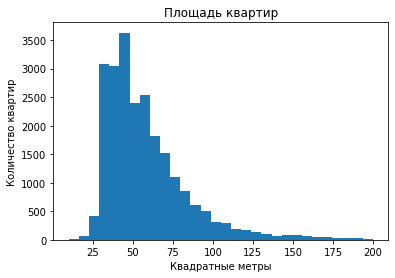

Квартиры с малой площадью:
19540    900.0
12859    631.2
3117     631.0
15651    618.0
5358     590.0
4237     517.0
8018     507.0
15016    500.0
5893     500.0
12401    495.0
Name: total_area, dtype: float64
Средняя общая площадь площадь: <bound method NDFrame._add_numeric_operations.<locals>.mean of 0        108.00
1         40.40
2         56.00
3        159.00
4        100.00
          ...  
23694    133.81
23695     59.00
23696     56.70
23697     76.75
23698     32.30
Name: total_area, Length: 23565, dtype: float64>


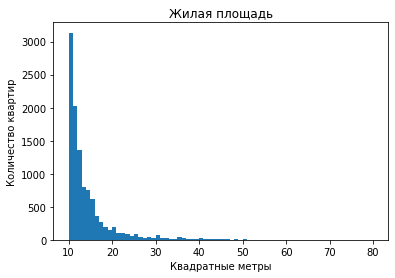

Квартиры с наибольшей площадью:


In [69]:
# Исследуем общую площадь
plt.hist(data['total_area'], bins=30, range=(10,200))
plt.title('Площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Квартиры с малой площадью:')
print(data['total_area'].sort_values(ascending=False).head(10))
print('Средняя общая площадь площадь:', data['total_area'].mean)
# Исследуем жилую площадь 
plt.hist(data['living_area'], bins=70, range=(10,80))
plt.title('Жилая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Квартиры с наибольшей площадью:')

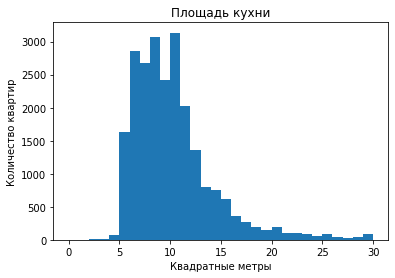

Квартиры с большими кухнями:
19540    112.0
20215    107.0
2489     100.7
5358     100.0
16239     93.2
16797     93.0
10867     87.2
4394      77.0
492       77.0
14644     75.0
Name: kitchen_area, dtype: float64


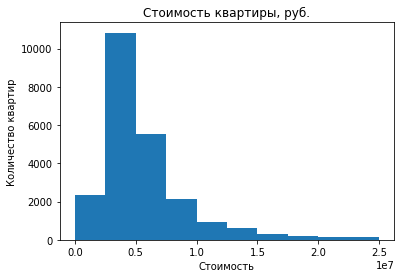

Самые дорогие квартиры:
12971    763000000
19540    420000000
14706    401300000
1436     330000000
15651    300000000
22831    289238400
16461    245000000
13749    240000000
5893     230000000
8900     190870000
Name: last_price, dtype: int64


In [70]:
# Исследуем площадь кухни
plt.hist(data['kitchen_area'], bins=30, range=(0,30))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Квартиры с большими кухнями:')
print(data['kitchen_area'].sort_values(ascending=False).head(10))

# Исследуем цену объекта
plt.hist(data['last_price'], bins=10, range=(0,25000000))
plt.title('Стоимость квартиры, руб.')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()
print('Самые дорогие квартиры:')
print((data['last_price']).sort_values(ascending=False).head(10))

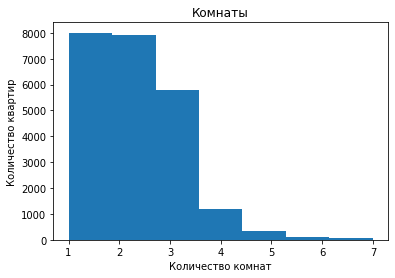

Квартиры с наибольшим числом комнат:
14498    19
18848    16
5358     15
20829    14
866      14
19540    12
648      11
9688     11
18891    10
18119    10
Name: rooms, dtype: int64


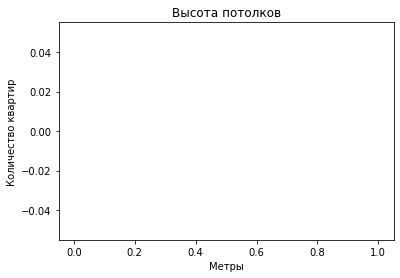

Квартиры с самыми низкими потолками:
22590    16.0
5712      5.0
16934     5.0
0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
Name: ceiling_height, dtype: object


In [71]:
# Исследуем количество комнат
plt.hist(data['rooms'], bins=7, range=(1,7))
plt.title('Комнаты')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()
print('Квартиры с наибольшим числом комнат:')
print(data['rooms'].sort_values(ascending=False).head(10))

# Исследуем высоту потолков
plt.hist(data.query('(ceiling_height > 2) & (ceiling_height < 4)')['ceiling_height'], bins=20)
plt.title('Высота потолков')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()
print('Квартиры с самыми низкими потолками:')
print(data['ceiling_height'].sort_values(ascending=False).head(10))

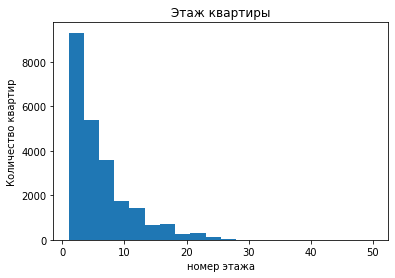

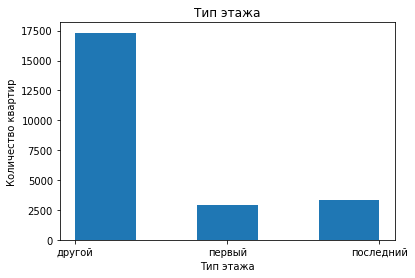

In [72]:
# Исследуем этаж квартиры
plt.hist(data['floor'], bins=20, range=(1,50))
plt.title('Этаж квартиры')
plt.xlabel('номер этажа')
plt.ylabel('Количество квартир')
plt.show()


# Исследуем тип этажа 
plt.hist(data['floor_type'], bins=5)
plt.title('Тип этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Количество квартир')
plt.show()



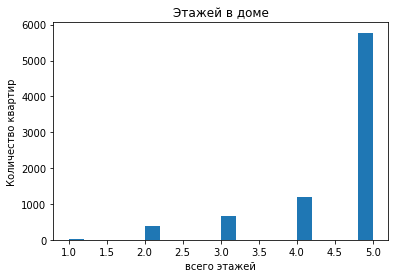

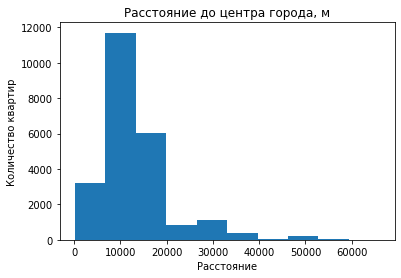

In [73]:
# Исследуем общее количество этажей в доме 
plt.hist(data['floors_total'], bins=20, range=(1,5))
plt.title('Этажей в доме')
plt.xlabel('всего этажей')
plt.ylabel('Количество квартир')
plt.show()

# Исследуем расстояние до центра города в метрах 
plt.hist(data['city_centers_nearest'], bins=10)
plt.title('Расстояние до центра города, м')
plt.xlabel('Расстояние')
plt.ylabel('Количество квартир')
plt.show()



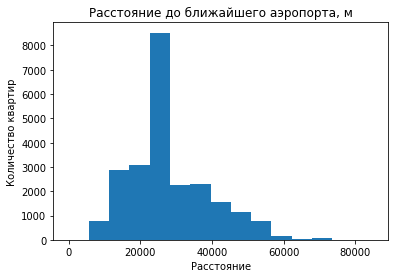

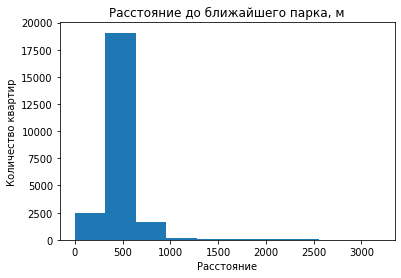

In [74]:
# Исследуем расстояние до ближайшего аэропорта  
plt.hist(data['airports_nearest'], bins=15)
plt.title('Расстояние до ближайшего аэропорта, м')
plt.xlabel('Расстояние')
plt.ylabel('Количество квартир')
plt.show()


# Исследуем расстояние до ближайшего парка 
plt.hist(data['parks_nearest'], bins=10)
plt.title('Расстояние до ближайшего парка, м')
plt.xlabel('Расстояние')
plt.ylabel('Количество квартир')
plt.show()

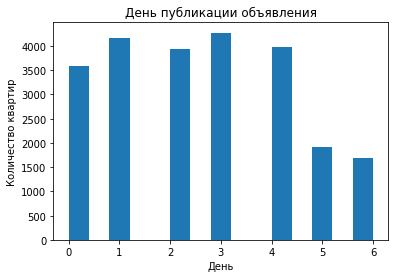

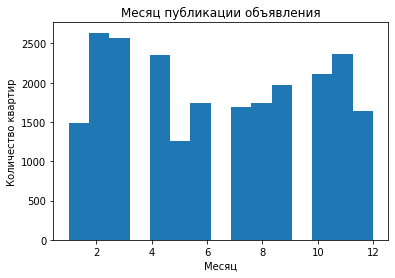

In [75]:
# Исследуем день публикации объявления  
plt.hist(data['first_day_exposition'].dt.dayofweek, bins=15)
plt.title('День публикации объявления')
plt.xlabel('День')
plt.ylabel('Количество квартир')
plt.show()


# Исследуем месяц публикации объявления 

plt.hist(data['first_day_exposition'].dt.month, bins=15)
plt.title('Месяц публикации объявления')
plt.xlabel('Месяц')
plt.ylabel('Количество квартир')
plt.show()

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             23565 non-null  int64         
 1   last_price               23565 non-null  int64         
 2   total_area               23565 non-null  float64       
 3   first_day_exposition     23565 non-null  datetime64[ns]
 4   rooms                    23565 non-null  int64         
 5   ceiling_height           3 non-null      object        
 6   floors_total             23565 non-null  int64         
 7   living_area              23565 non-null  float64       
 8   floor                    23565 non-null  int64         
 9   is_apartment             23565 non-null  bool          
 10  studio                   23565 non-null  bool          
 11  open_plan                23565 non-null  bool          
 12  kitchen_area             23565 n

### Вывод
Площадь

Большинство квартир - менее 100 квадратных метров. В подборке есть несколько вариантов с площадью более 200 квадратных метров.

Стоимость

В основном стоимость квартир - порядка 5 миллионов. Больше 20 миллионов вариантов мало.

Комнаты

В основном квартиры состоят из 1, 2 и 3 комнат. Есть небольшая доля 4-комнатных квартир. Варианты, где больше 7 комнат выглядят странно и подозрительно. Даже при объединении нескольких квартир в одну это подозрительно. Возможно, это отдельный дом.

Высота потолков

Большинство вариантов имеют высоту потолков от 2,5 до 3 метров. Больше 4 метров высота потолков выглядит подозрительно. Есть значения в 27 метров (высота 9-этажного дома) - это может быть ошибкой данных и реальная высота 2,7 метра.

Площадь кухни

Самые распространённые кухни - от 5 до 15 метров. Больше 20 метров кухни практически не встречаются. Больше 30 - единичные случаи.

Жилая площадь

Самые распространённые варианты с жилой площадью от 10 до 50 метров. После 80 метров встречаются единичные случаи. Два пика графика вызваны, вероятно, тем, что это жилые площади для 1-комнатной, затем для 2-комнатной и после этого для 3-комнатной квартиры.

Стоимость квадратного метра

Имеет нормальное распределение с пиком в районе 100,000. Варианты дороже 250,000 являются единичными.

Тип этажа 

Чаще всего продаются картиры между первым и последним этажами

День и месяц публикации

Чаще всего объявления выкладывают в понедельник и среду, а февраль и март - самые популярные месяцы продажи квартиры

Расстояние до парка

Самые частые объявления о квартирах которые находятся в пределах 500 от парка

Раастояние до аэропорта

Самые частые объявления о квартирах которые находятся в пределах 20 км от аэропорта

Расстояние до центра города 

Больше всего квартир в пределах 10 км от центра города

### Итог

Средняя квартира - в 10 км от центра города (только для СПб) и 20 км от аэропорта. Рядом есть парк, до окторого идти не больше 500 метров. 
Квартира находится между первым и последним этажом 5-этажного дома, обшей площадью 50-55 кв.метров, двушка.

# 4.2 Исследование скорости продажи квартиры

In [77]:
data['days_exposition'].describe()

count    23565.000000
mean       173.498578
std        209.477640
min          1.000000
25%         45.000000
50%         97.000000
75%        211.000000
max       1580.000000
Name: days_exposition, dtype: float64

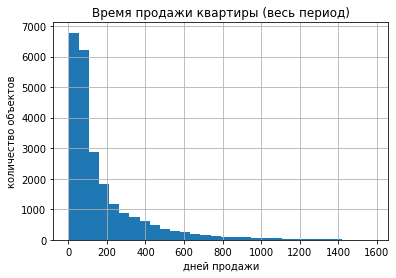

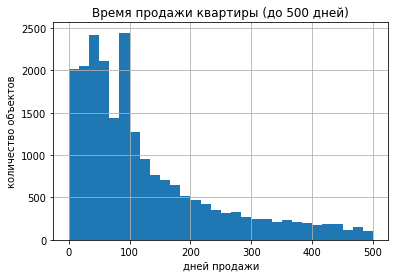

In [78]:
#гистограмма времени продажи:
data['days_exposition'].hist(bins=30).set(title='Время продажи квартиры (весь период)', 
    xlabel='дней продажи', ylabel='количество объектов');
plt.show()

#гистограмма по срезу времени продажи до 500 дней:
data['days_exposition'].hist(bins=30, range=(0, 500)).set(
    title='Время продажи квартиры (до 500 дней)', 
    xlabel='дней продажи', ylabel='количество объектов');

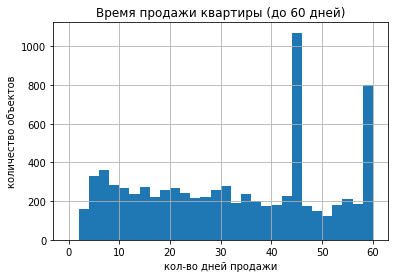

In [79]:
#Общее время продажи-до 1618 дней. При этом можно увидеть, что большинство квартир продается в первые 60-90 дней с момента публикации. Рассмотрим эту часть гистограммы подробнее:
data['days_exposition'].hist(bins=30, range=(0, 60)).set(
    title='Время продажи квартиры (до 60 дней)', 
    xlabel='кол-во дней продажи', ylabel='количество объектов');


In [80]:
# 2 пика - на 45 и 60 дни
# определим выбросы как значения ниже 25 процентиля и выше 75 процентиля:
minimal = round(data['days_exposition'].quantile(0.25),2) 
maximum = round(data['days_exposition'].quantile(0.75),2)

print('Выбросы по нижней границе:', minimal, 
      'Выбросы по верхней границе:', maximum)

Выбросы по нижней границе: 45.0 Выбросы по верхней границе: 211.0


### Вывод

Общее время продажи жилой недвижимости-до 1580 дней. Медианное время продажи - 95 дней, а среднее - 174 дня. При этом видно, что большинство квартир продается в первые 60 дней с момента публикации. Исходя из расчета выбросов можно сказать, что продажи прошли очень быстро, если сделки были оформлены в период до 45 дней и слишком долго, если до оформления сделки свыше 211 дней.

## 4.3 Факторы, влияющие на полную стоимость объекта

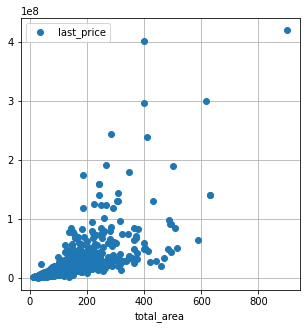

Корреляция цены и общей площади: 

            last_price  total_area
last_price    1.000000    0.739123
total_area    0.739123    1.000000 



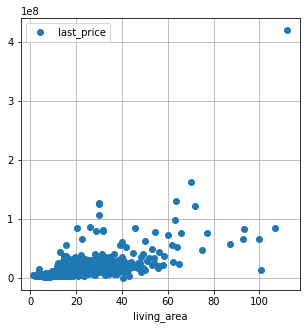

Корреляция цены и жилой площади: 

             last_price  living_area
last_price     1.000000     0.317345
living_area    0.317345     1.000000 



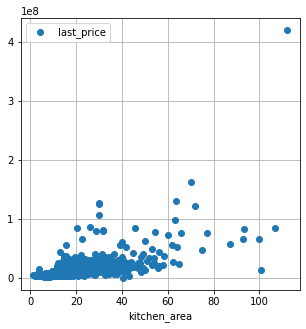

Корреляция цены и площади кухни: 

              kitchen_area  last_price
kitchen_area      1.000000    0.317345
last_price        0.317345    1.000000 



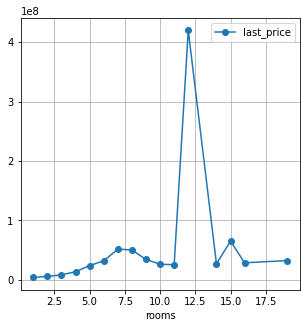

Корреляция цены и числа комнат: 

            last_price     rooms
last_price    1.000000  0.435721
rooms         0.435721  1.000000 



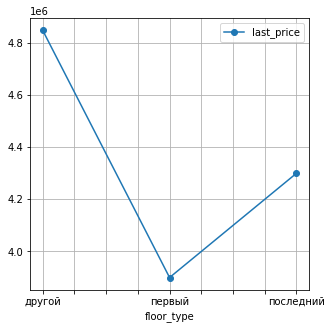

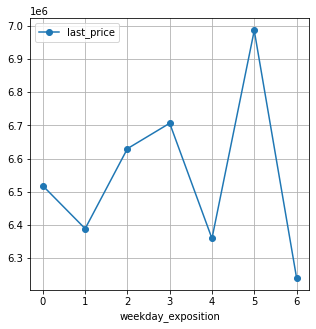

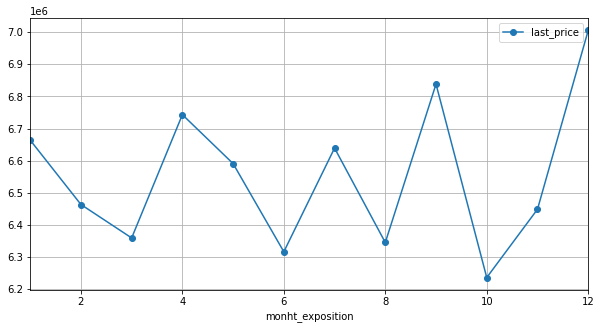

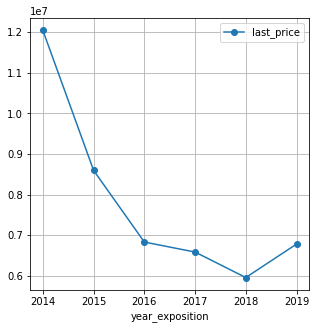

In [81]:
# Зависимость цены от общей площади
(
    data.pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и общей площади:','\n')
print(data.pivot_table(index='floor', values=['total_area', 'last_price']).corr(),'\n')

# Зависимость цены от жилой площади
(
    data.pivot_table(index='living_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и жилой площади:','\n')
print(data.pivot_table(index='floor', values=['living_area', 'last_price']).corr(),'\n')

# Зависимость цены от площади кухни
(
    data.pivot_table(index='kitchen_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и площади кухни:','\n')
print(data.pivot_table(index='floor', values=['kitchen_area', 'last_price']).corr(),'\n')


# Зависимость цены от числа комнат
(
    data.query('rooms > 0').pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и числа комнат:','\n')
print(data.query('rooms > 0').pivot_table(index='floor', values=['rooms', 'last_price']).corr(),'\n')


# Зависимость цены от типа этажа
(
    data.pivot_table(index='floor_type', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()



# Зависимость от дня размещения
(
    data.pivot_table(index='weekday_exposition', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
# Зависимость от месяца размещения
(
    data.pivot_table(index='monht_exposition', values='last_price')
    .plot(grid=True, style='o-', xlim=(1,12), figsize=(10, 5))
)
plt.show()

# Зависимость от года размещения
(
    data.pivot_table(index='year_exposition', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()


### Вывод
Чем больше площадь, тем выше стоимость. Корреляция этих параметров крайне высокая. Число комнат влияет на цену (больше комнат - больше цена), однако зависимость ниже, чем у площади. Можно сделать два вывода: бывают квартиры с большими по площади комнатами; квартиры в центре состоят из малого числа комнат, но стоят достаточно высоко.

Самые дешевые квартиры находятся на первом этаже, а сымые дорогие - между первым и последним.

Зависимость от дня, месяца и года
День недели: дороже всего квартиры, опубликованные в среду, дешевле всего - в субботу.
Месяц: дороже всего квартиры, продающиеся с апреля, дешевле всего - с июня.
Год: квартиры очень сильно подешевели в 2016-2018 годах, В 2019 году цены снова стали повышаться.

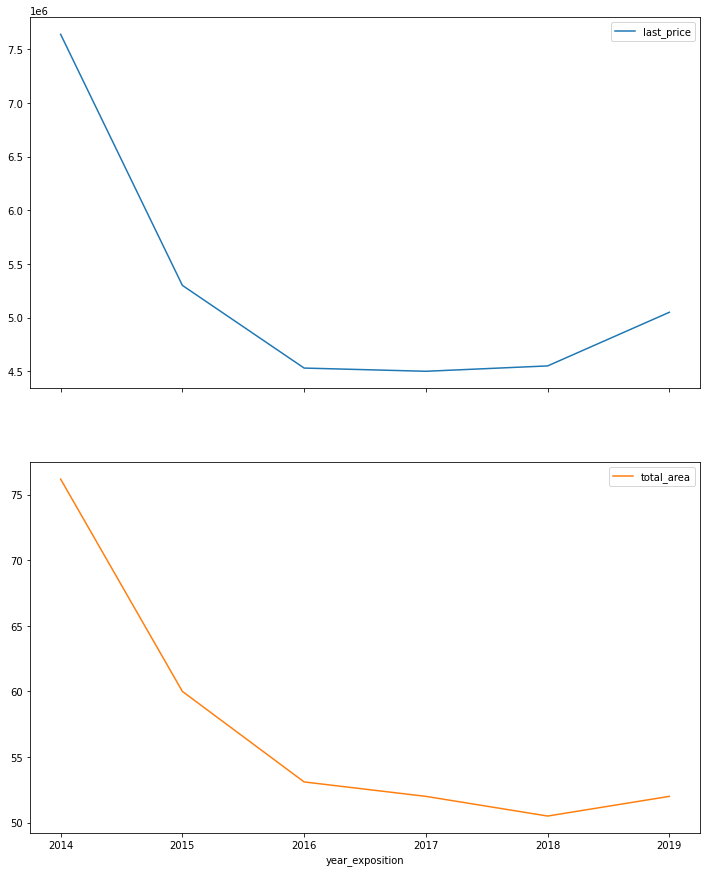

In [82]:
df1 = pd.DataFrame(data=data, columns=['year_exposition', 'last_price', 'total_area'])
df1.reset_index(drop=True , inplace=True)
df1.pivot_table(index='year_exposition', values=['last_price','total_area'] ,aggfunc='median').plot(subplots=True, figsize=(12, 15))
plt.show();

## 4.4 Средняя цена одного квадратного метра в топ-10 городов по количеству объявлений

In [83]:
data['last_price'] = data['last_price']
top_10_sale_pivot = data.pivot_table(index='locality_name', values=['last_price'], aggfunc=['count', 'mean'])
top_10_sale_pivot_sorted = top_10_sale_pivot.reindex(top_10_sale_pivot['count'].sort_values(by='last_price', ascending=False).index)
top_10_sale_pivot_sorted.head(10)

,count,mean
,last_price,last_price
locality_name,,
Санкт-Петербург,15651,8.064895e+06
Мурино,586,3.680841e+06
Кудрово,470,4.354895e+06
Шушары,439,4.109809e+06
Всеволожск,398,3.789068e+06
Пушкин,369,6.469036e+06
Колпино,338,3.964021e+06
Парголово,327,4.488075e+06


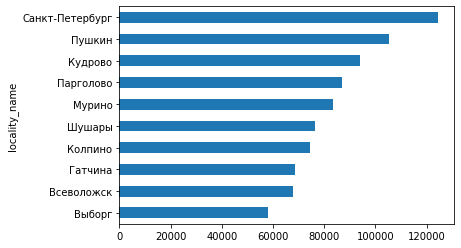

In [84]:
top_10 = data.pivot_table(index='locality_name', values=['last_price','total_area'], aggfunc=['sum','count'])
top_10.columns=['last_price_sum','total_area_sum','last_price_count','total_area_count']
top_10.pop('total_area_count')
top_10.sort_values(by=['last_price_count'],ascending=False, inplace=True)
top_10 = top_10.iloc[:10]
top_10['price_sq_meter'] = top_10['last_price_sum']/top_10['total_area_sum']
top_10.sort_values(by=['price_sq_meter'],ascending=True, inplace=True)
top_10['price_sq_meter'].plot(kind='barh')
plt.show();

## 4.5 Средняя цена километра от центра города в Спб

In [85]:
distance_pivot =(
    data[data['locality_name']=='Санкт-Петербург']
    .pivot_table(
        index='city_centers_nearest_km',
        values='last_price',
        aggfunc='mean')
)

distance_pivot

,last_price
city_centers_nearest_km,
0,3.144912e+07
1,2.120672e+07
2,1.778832e+07
3,1.113739e+07
4,1.330428e+07
5,1.445600e+07
6,1.533842e+07
7,1.477515e+07
8,9.949111e+06


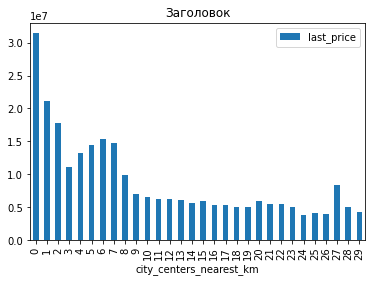

In [87]:
distance_pivot.plot.bar(title = 'Заголовок')
plt.show();

# Общий вывод

Проведенное исследование показало, что большинство квартир - менее 100 квадратных метров. В подборке есть несколько вариантов с площадью более 200 квадратных метров со стоимостью порядка 5 миллионов. 

В основном квартиры состоят из 1, 2 и 3 комнат с высотой потолков от 2,5 до 3 метров и кухней от 5 до 15 метров. Больше 20 метров кухни практически не встречаются. Больше 30 - единичные случаи.
Самые распространённые варианты с жилой площадью около 50 метров. 
Чаще всего продаются картиры между первым и последним этажами
Самые частые объявления о квартирах которые находятся в пределах 500 от парка и порядка 20 км от аэропорта и 10 км от центра города

Портрет средней квартиры:
* цена 3,4 млн руб. до 6,8 млн руб;
* общей площадью от 40 до 70 квадратных метров;
* высота потолоков средняя - 2,65;
* от 1 до 3 комнат.

Чаще всего объявления выкладывают в понедельник и среду, а февраль и март - самые популярные месяцы продажи квартиры
